In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Librerias

In [1]:
 from astropy.io import fits

In [2]:
%matplotlib inline


In [3]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [4]:
import numpy as np
import pandas as pd
from scipy import interpolate
import io

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pywt
from astropy.io import ascii
import os

import json


In [5]:
pd.set_option('display.max_columns',30)

# Montar google drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:

os.chdir("/content/drive/MyDrive/Astrofisica/Espectros")
#/content/drive/My Drive/Visualizacion
os.getcwd()

'/content/drive/MyDrive/Astrofisica/Espectros'

# Carga de json con los espectros

In [8]:
directorio = 'BD_espectros_sample/'
nom_fichero = 'datos_obj_espectros.json'
df_obj_espectros_raw = pd.read_json(directorio+nom_fichero)
df_obj_espectros_raw

,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,SPECOBJID,Z,PLATEQUALITY,CLASS,SUBCLASS
0,spec-1941-53386-0433.fits,"[0.35031041500000004, -0.1485088319, 0.0116492...","[3798.4, 3799.3, 3800.1, 3801.0, 3801.9, 3802....",1941,53386,433,2185490798122919936,-0.000109,good,STAR,M2
1,spec-1808-54176-0058.fits,"[-0.6632891893, 2.39052701, -5.435426712, 1.57...","[3815.0, 3815.9, 3816.8, 3817.7, 3818.6, 3819....",1808,54176,58,2035643044551747584,-0.000234,good,STAR,M2V
2,spec-1970-53386-0009.fits,"[-0.4185376167, 0.1414910257, -0.6999538541, 0...","[3807.2, 3808.0, 3808.9, 3809.8, 3810.7, 3811....",1970,53386,9,2218025347188811776,-0.000053,good,STAR,M6
3,spec-1803-54152-0200.fits,"[-0.5595631599, 1.6141862868999999, -0.4718873...","[3808.0, 3808.9, 3809.8, 3810.7, 3811.5, 3812....",1803,54152,200,2030052577277667328,0.000217,good,STAR,M2V
4,spec-1955-53442-0499.fits,"[-0.4254819751, 0.28042450550000003, 1.2131350...","[3801.0, 3801.9, 3802.8, 3803.6, 3804.5, 3805....",1955,53442,499,2201271539700099072,-0.000042,marginal,STAR,M2V
...,...,...,...,...,...,...,...,...,...,...,...
3491,spec-0885-52379-0137.fits,"[0.6488318443000001, 1.1210706234, 0.755453825...","[3803.6, 3804.5, 3805.4, 3806.3, 3807.2, 3808....",885,52379,137,996459115741997056,-0.000392,good,STAR,M3
3492,spec-0712-52199-0221.fits,"[3.8596711159, 2.1484868526, -2.7742624283, 0....","[3805.4, 3806.3, 3807.2, 3808.0, 3808.9, 3809....",712,52199,221,801701518582507520,0.000100,good,STAR,M2
3493,spec-0730-52466-0251.fits,"[1.093152523, 1.5214309691999999, 2.8724341393...","[3812.4, 3813.3, 3814.2, 3815.0, 3815.9, 3816....",730,52466,251,821975967722399744,-0.000098,good,STAR,M2
3494,spec-0707-52177-0095.fits,"[-0.6275257468000001, -0.2927546501, -1.621553...","[3823.0, 3823.8, 3824.7, 3825.6, 3826.5, 3827....",707,52177,95,796037384062920704,-0.000013,good,STAR,M8


In [9]:
df_obj_espectros_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3496 entries, 0 to 3495
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nom_fichero_fit  3496 non-null   object 
 1   flujo            3496 non-null   object 
 2   long_A           3496 non-null   object 
 3   PLATE            3496 non-null   int64  
 4   MJD              3496 non-null   int64  
 5   FIBERID          3496 non-null   int64  
 6   SPECOBJID        3496 non-null   int64  
 7   Z                3496 non-null   float64
 8   PLATEQUALITY     3496 non-null   object 
 9   CLASS            3496 non-null   object 
 10  SUBCLASS         3496 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 327.8+ KB


In [ ]:
df_obj_espectros_raw.head(2)

,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,SPECOBJID,Z,PLATEQUALITY,CLASS,SUBCLASS
0,spec-1941-53386-0433.fits,"[0.35031041500000004, -0.1485088319, 0.0116492...","[3798.4, 3799.3, 3800.1, 3801.0, 3801.9, 3802....",1941,53386,433,2185490798122919936,-0.000109,good,STAR,M2
1,spec-1808-54176-0058.fits,"[-0.6632891893, 2.39052701, -5.435426712, 1.57...","[3815.0, 3815.9, 3816.8, 3817.7, 3818.6, 3819....",1808,54176,58,2035643044551747584,-0.000234,good,STAR,M2V


##Carga plantillas subenanas

In [13]:
directorio = 'Plantillas/'
nom_fichero = 'espectros_plantillas.json'
df_esp_pla = pd.read_json(directorio+nom_fichero)
df_esp_pla.head(3)

,flujo,long_A,clase_metalicidad
0,"[0.3998440802, 0.3969808519, 0.3941309154, 0.3...","[5000.0, 5000.0581054688, 5000.1166992188, 500...",usdm0
1,"[0.3611840904, 0.3597990274, 0.3584717214, 0.3...","[5000.0, 5000.0581054688, 5000.1166992188, 500...",usdm1
2,"[0.3468220234, 0.3459565341, 0.3451767564, 0.3...","[5000.0, 5000.0581054688, 5000.1166992188, 500...",usdm2


# Pruebas filtrado sobre plantillas

Seleccionamos un espectro.

In [14]:
espectro = 26
x_p= df_esp_pla.loc[espectro,'long_A']
y_p= df_esp_pla.loc[espectro,'flujo']

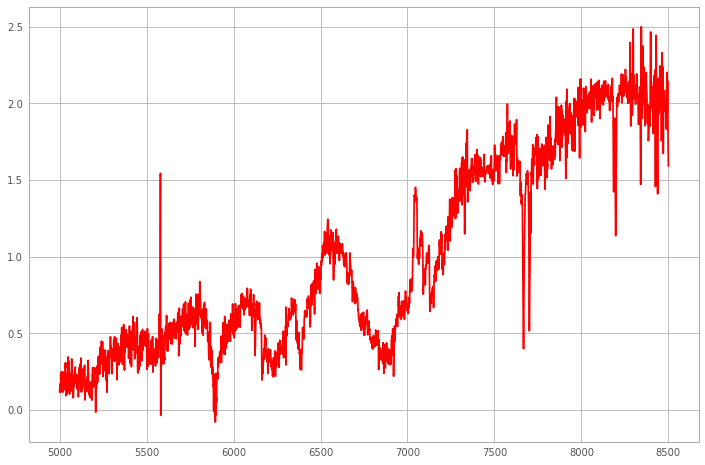

In [15]:
plt.figure(figsize=(12,8))

plt.plot(x_p,y_p,marker='', color= 'r', drawstyle='steps-mid',alpha=1)


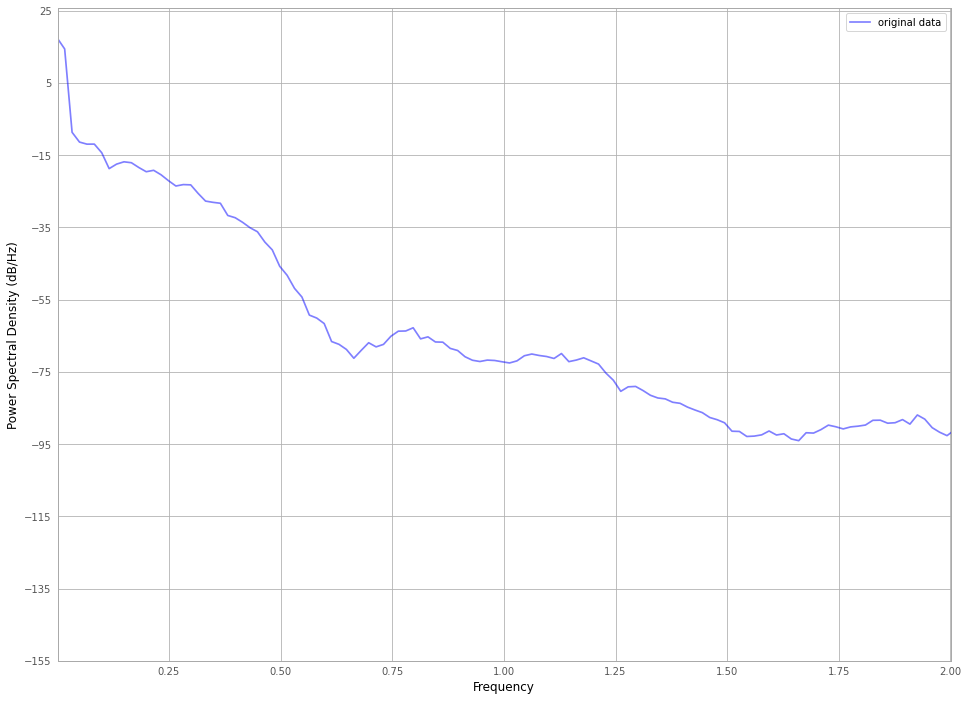

In [16]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.psd.html

plt.figure(1,figsize=(16,12))
Pw,frec  = plt.psd(y_p, NFFT=2**10, Fs=int(len(x_p)/3500), label='original data', color='blue',alpha=0.5)

#plt.ylim(-5,20)
plt.xlim(0.001,2)
plt.legend()

In [ ]:
Pw[:5]

array([54.58796545, 27.25204538,  0.13456414,  0.07220661,  0.06327815])

In [ ]:
frec[0:5]

array([0.        , 0.01660156, 0.03320312, 0.04980469, 0.06640625])

In [ ]:
Pw[0]/2**(0.5)

38.599520541585456

## Submuestreo plantillas

Binarizamos según  la base definida de longitudes de onda.
Podemos usar la mediana o bien la media.

In [17]:
new_long = np.arange(5000+0.5, 8500, 0.5)
y_p=np.asarray(y_p)
x_p=np.asarray(x_p)

Usamos la mediana

In [18]:
new_flujo = []
for i in new_long:
  indices = np.where((x_p>=i-0.5)&(x_p<i+0.5)) #intervalos de binarizacion
  new_flujo.append(np.median(y_p[indices]))
new_flujo = np.asarray(new_flujo)
new_flujo



array([0.1188349 , 0.11720747, 0.13211988, ..., 1.72438204, 1.67739284,
       1.63371682])

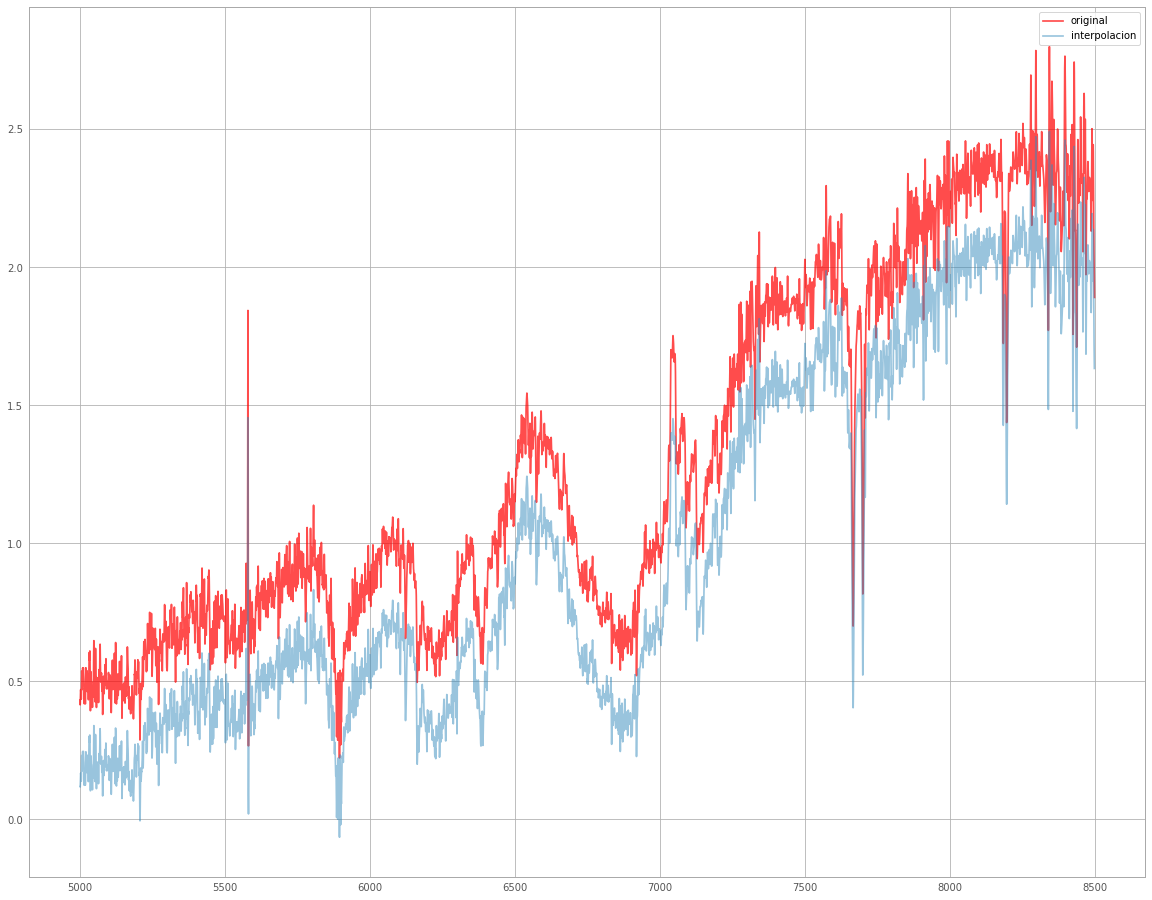

In [19]:
plt.figure(figsize=(20,16))
plt.plot(x_p, [k+0.3 for k in y_p], color='r', label = 'original',alpha = 0.7) #desplazamos en 3 el espectro original
plt.plot(new_long, new_flujo, label='interpolacion', alpha = 0.5)
#plt.ylim(-4,10)
plt.legend()
plt.show()

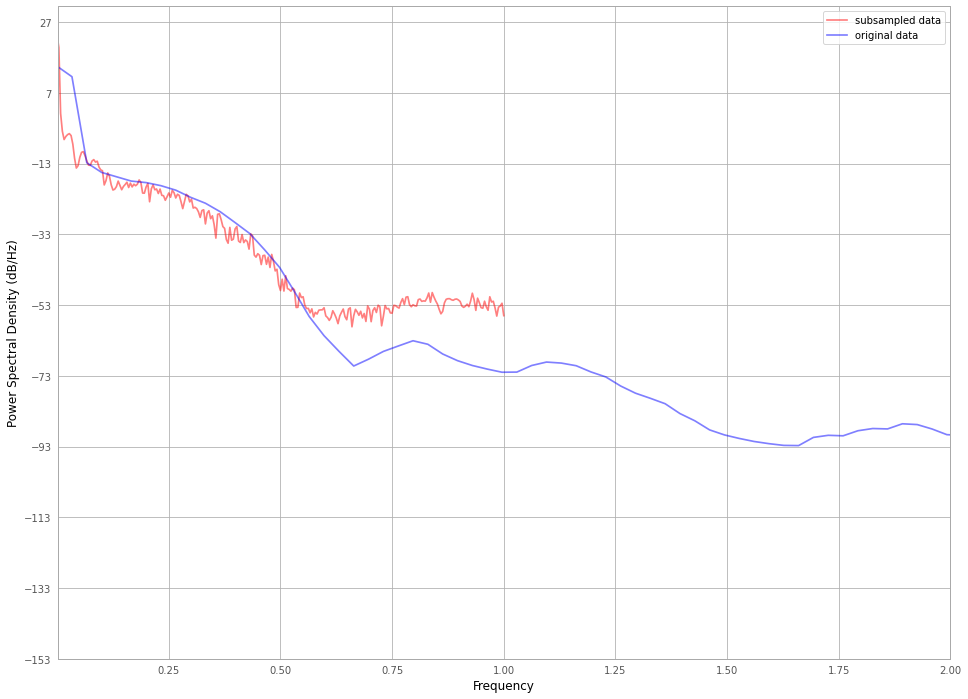

In [21]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.psd.html

plt.figure(1,figsize=(16,12))

plt.psd(new_flujo, NFFT=512, Fs=2, label='subsampled data', color='red',alpha=0.5)
plt.psd(y_p, NFFT=512, Fs=int(len(x_p)/3500), label='original data', color='blue',alpha=0.5)
#plt.ylim(-5,20)
plt.xlim(0.001,2)
plt.legend()

## Filtro butter

In [22]:
x_p=new_long
y_p=new_flujo

In [23]:
from scipy import signal

In [39]:
Wn=0.25
fb=2
order = 3
sos = signal.butter(order, Wn, 'lp', fs=fb, output='sos')
y_p_butt = signal.sosfilt(sos, y_p)

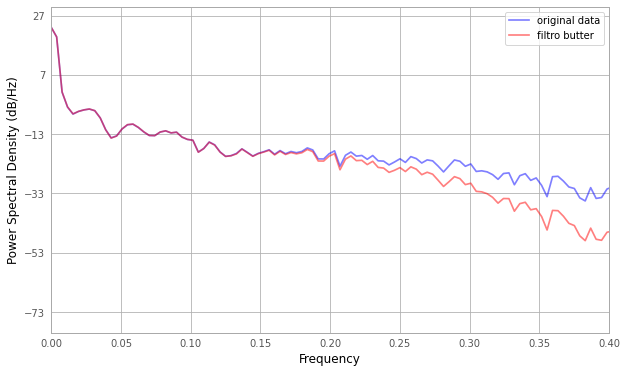

In [40]:
plt.figure(1,figsize=(10,6))
plt.psd(y_p, NFFT=512, Fs=2, label='original data', color='blue',alpha=0.5)
plt.psd(y_p_butt, NFFT=512, Fs=2, label='filtro butter', color='red',alpha=0.5)
plt.ylim(-80,30)
plt.xlim(0.000,0.4)
plt.legend()

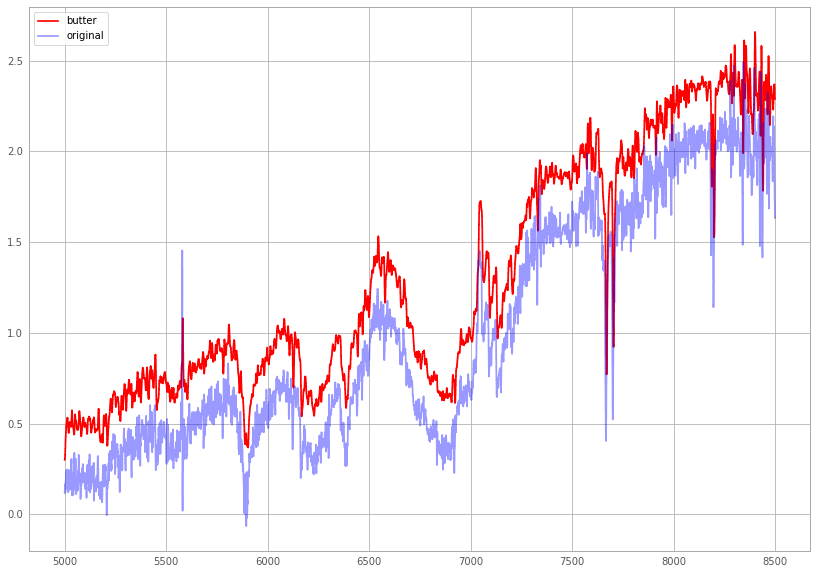

In [26]:
plt.figure(figsize=(14,10))
#for 
plt.plot(x_p,y_p_butt+0.3,marker='', color= 'r', label = 'butter', drawstyle='steps-mid')
plt.plot(x_p,y_p,marker='', color= 'b', label = 'original', drawstyle='steps-mid',alpha=0.4)
plt.legend()

(6500.0, 6800.0)

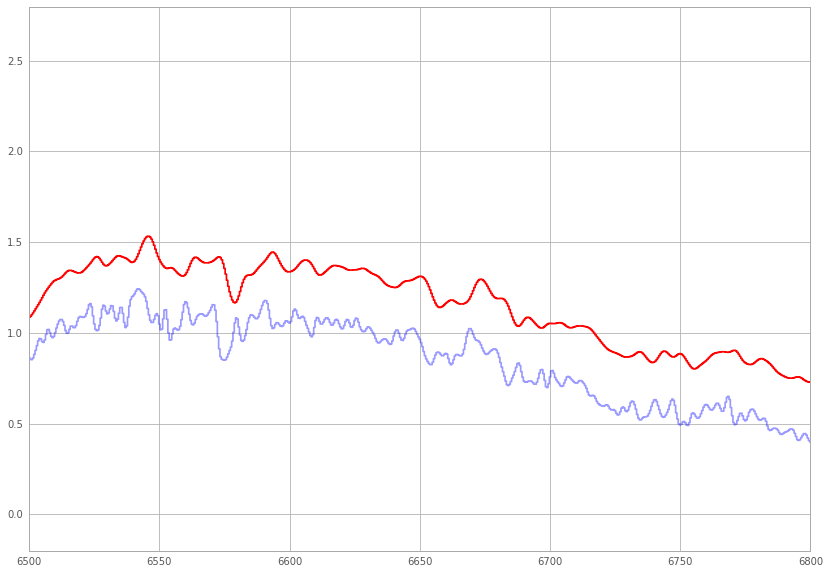

In [27]:
plt.figure(figsize=(14,10))

plt.plot(x_p,y_p_butt+0.3,marker='', color= 'r', label = 'butter', drawstyle='steps-mid')
plt.plot(x_p,y_p,marker='', color= 'b', label = 'original', drawstyle='steps-mid',alpha=0.4)
plt.xlim(6500,6800)
#plt.ylim(0.8,1.2)


## Prueba con ondículas

In [28]:
wavelet_type='sym3'
print(pywt.Wavelet(wavelet_type))

Wavelet sym3
  Family name:    Symlets
  Short name:     sym
  Filters length: 6
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       near symmetric
  DWT:            True
  CWT:            False


### Pruebas de eliminar todos los coeficientes de un nivel.

Vemos como se comporta en función de los coeficientes que quitemos. Cuanto mayor es el índice de DWTcoeffs que eliminamos mayor es la frecuencia que quitamos

In [29]:
nivel=4
DWTcoeffs = pywt.wavedec(y_p,wavelet_type,mode='sym', level=nivel, axis=-1)

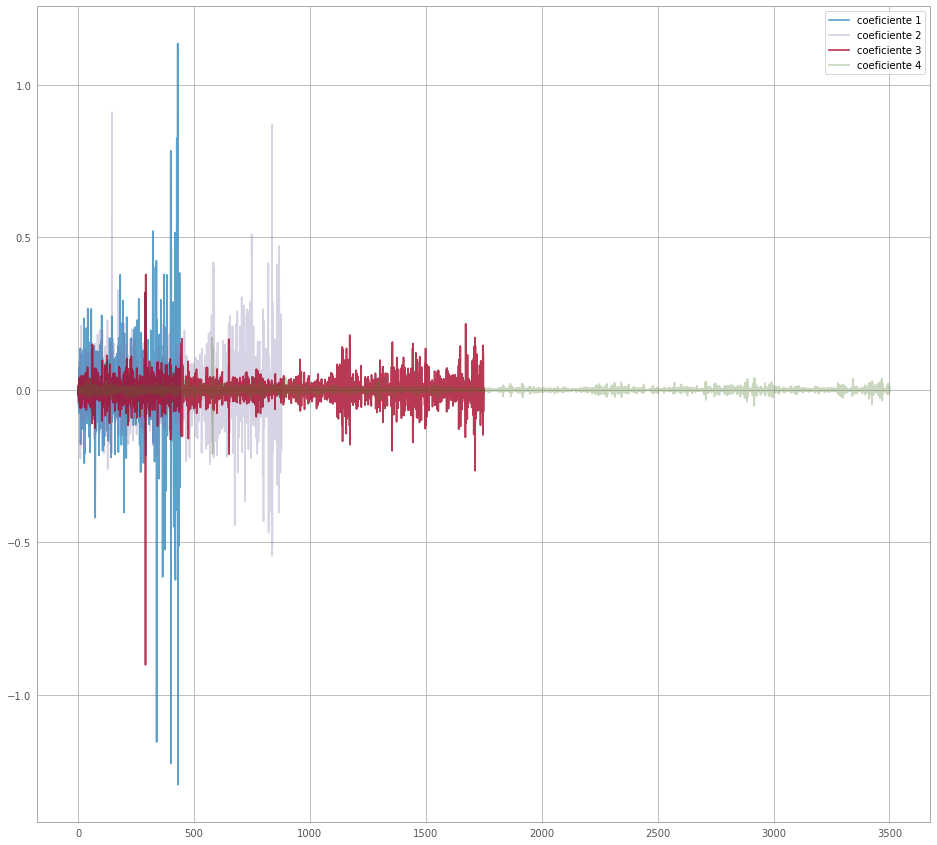

In [30]:
plt.figure(figsize=(16,15))
for i in range(1,nivel+1):
  plt.plot(range(0, DWTcoeffs[i].shape[0]),DWTcoeffs[i], label='coeficiente '+str(i),alpha=0.3+i/2)
#plt.xlim(200,800)
plt.legend()

Anulamos los dos o tres niveles más bajo de detalle

In [31]:
for coef_to_cero in [4,3]:
  DWTcoeffs[coef_to_cero] = np.zeros_like(DWTcoeffs[coef_to_cero])


In [32]:
filt_DWTcoeffs=DWTcoeffs.copy()

### Reconstrucción de la señal.

In [33]:
#https://pywavelets.readthedocs.io/en/0.2.2/ref/signal-extension-modes.html#ref-modes

y_p_dwt=pywt.waverec(filt_DWTcoeffs,wavelet_type,mode='sym',axis=-1) 
y_p_dwt=y_p_dwt[:len(x_p)]

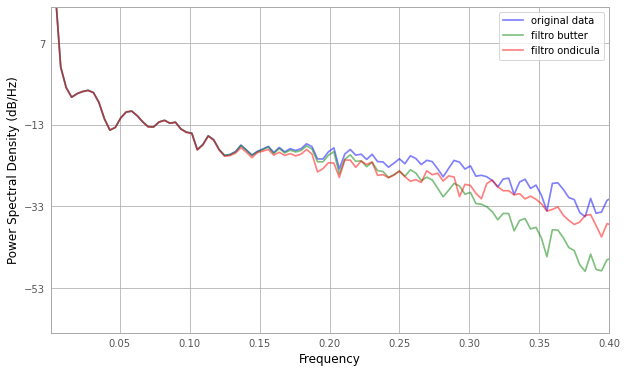

In [41]:
plt.figure(1,figsize=(10,6))
plt.psd(y_p, NFFT=512, Fs=2, label='original data', color='blue',alpha=0.5)
plt.psd(y_p_butt, NFFT=512, Fs=2, label='filtro butter', color='green',alpha=0.5)
plt.psd(y_p_dwt, NFFT=512, Fs=2, label='filtro ondicula', color='red',alpha=0.5)
plt.ylim(-64,16)
plt.xlim(0.001,0.4)
plt.legend()

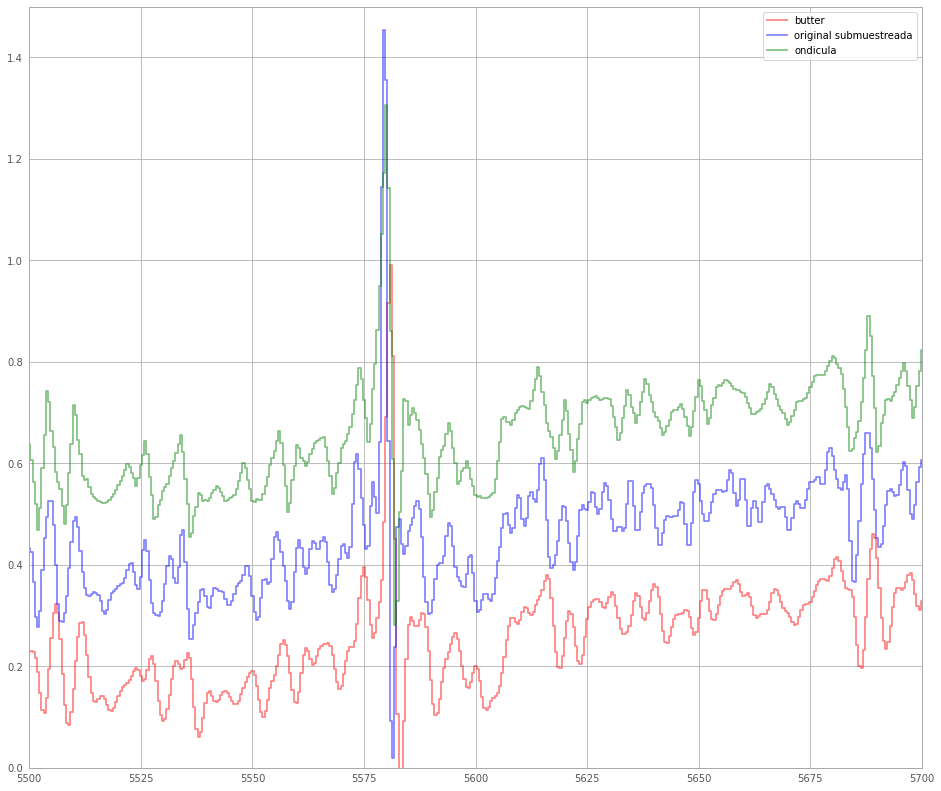

In [42]:
plt.figure(figsize=(16,14))
alfa = 0.5
plt.plot(x_p,y_p_butt-0.2,marker='', color= 'r', label = 'butter', drawstyle='steps-mid',alpha=alfa)#desplazamos por visualización
plt.plot(x_p,y_p,marker='', color= 'b', label = 'original submuestreada', drawstyle='steps-mid',alpha=alfa)
plt.plot(x_p,y_p_dwt+0.2,marker='', color= 'g', label = 'ondicula', drawstyle='steps-mid',alpha=alfa)#desplazamos por visualización
plt.xlim(5500,5700)
plt.ylim(0,1.5)
plt.legend()

In [ ]:
print(f"Varianza espectro para butter {np.var(y_p_butt)}")
print(f"Varacianza para filtro ondículas {np.var(y_p_dwt)}")
print(f"Varianza  espectro original {np.var(y_p)}")


Varianza espectro para butter 0.4134092003841681
Varacianza para filtro ondículas 0.4136438430371801
Varianza  espectro original 0.41619724011634424


In [ ]:
print(f"Promedio espectro para butter {np.mean(y_p_butt)}")
print(f"Promedio para filtro ondículas {np.mean(y_p_dwt)}")
print(f"Promedio espectro original {np.mean(y_p)}")


Promedio espectro para butter 0.9983998560697188
Promedio para filtro ondículas 1.0000222000207424
Promedio espectro original 1.0000249082233106


Vemos que no modificamos mucho la varianza. Si tenemos señal+ruido y suponiendo que son independintes. Var(señal+ruido) = Var(señal) + Var(ruido), y la esperanza E, E(señal + ruido) = E(señal)+E(ruido) = E(señal) ya que E(ruido) = 0

Podemos ver el error cuadrático medio calculado como la diferencia entre el espectro original y los filtrados.

In [ ]:
print(f"mse para butter {((y_p_butt - y_p)**2).mean()}")
print(f"mse para ondículas {((y_p_dwt - y_p)**2).mean()}")

mse para butter 0.011059402756837368
mse para ondículas 0.00254470172451223


Vemos que aunque las varianzas no cambián mucho, sí que lo hacen los mse. Esto indica como ya vimos que el filtro Butter nos desfasa la señal.

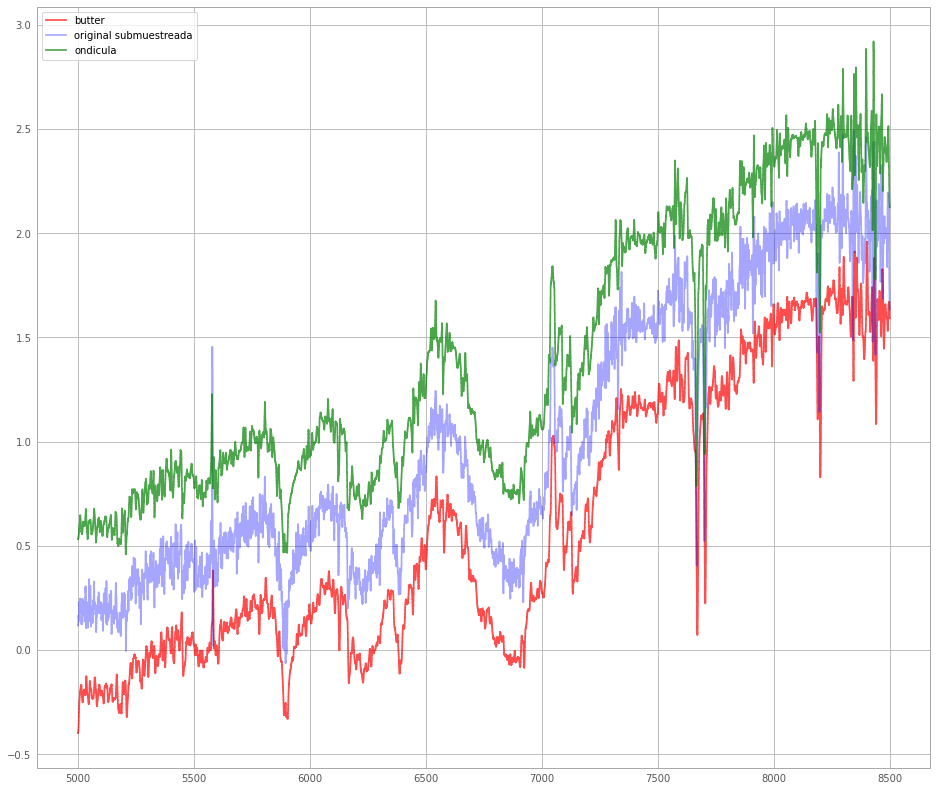

In [ ]:
plt.figure(figsize=(16,14))
alfa = 0.7
plt.plot(x_p,y_p_butt-0.4,marker='', color= 'r', label = 'butter', drawstyle='steps-mid',alpha=alfa)
plt.plot(x_p,y_p,marker='', color= 'b', label = 'original submuestreada', drawstyle='steps-mid',alpha=alfa/2)
plt.plot(x_p,y_p_dwt+0.4,marker='', color= 'g', label = 'ondicula', drawstyle='steps-mid',alpha=alfa)
#plt.xlim(5000,6000)
#plt.ylim(-2,5)
plt.legend()

### Prueba filtrado suave NO hechas



#### pruebas filtrado suave

In [ ]:
def filtrado_coef(std, mediana, n_sigma):
  def smooth(valor):
    if valor > mediana+n_sigma*std:
      valor=mediana+std
    elif valor < mediana-n_sigma*std:
      valor = mediana-std
    return valor
  return smooth

In [ ]:
n_sigma = 5
for coef in [1,2]:
  mediana = np.median(DWTcoeffs[coef])
  media = DWTcoeffs[coef].mean()
  d_std = DWTcoeffs[coef].std()
  
  suavizado = filtrado_coef(d_std, mediana, n_sigma)
  filt_DWTcoeffs[coef]= np.asarray(list(map(suavizado, DWTcoeffs[coef])))

  print(f"Estadísticos coeficientes nivel {coef}")
  print("---------------------------------------")
  print(f"media {media}   std {d_std}")
  print(f"mediana {mediana}\n*2")
   

Estadísticos coeficientes nivel 1
---------------------------------------
media -5.41822031862449e-07   std 0.02453434931966939
mediana 0.00021691247709669514
*2
Estadísticos coeficientes nivel 2
---------------------------------------
media 0.0   std 0.0
mediana 0.0
*2


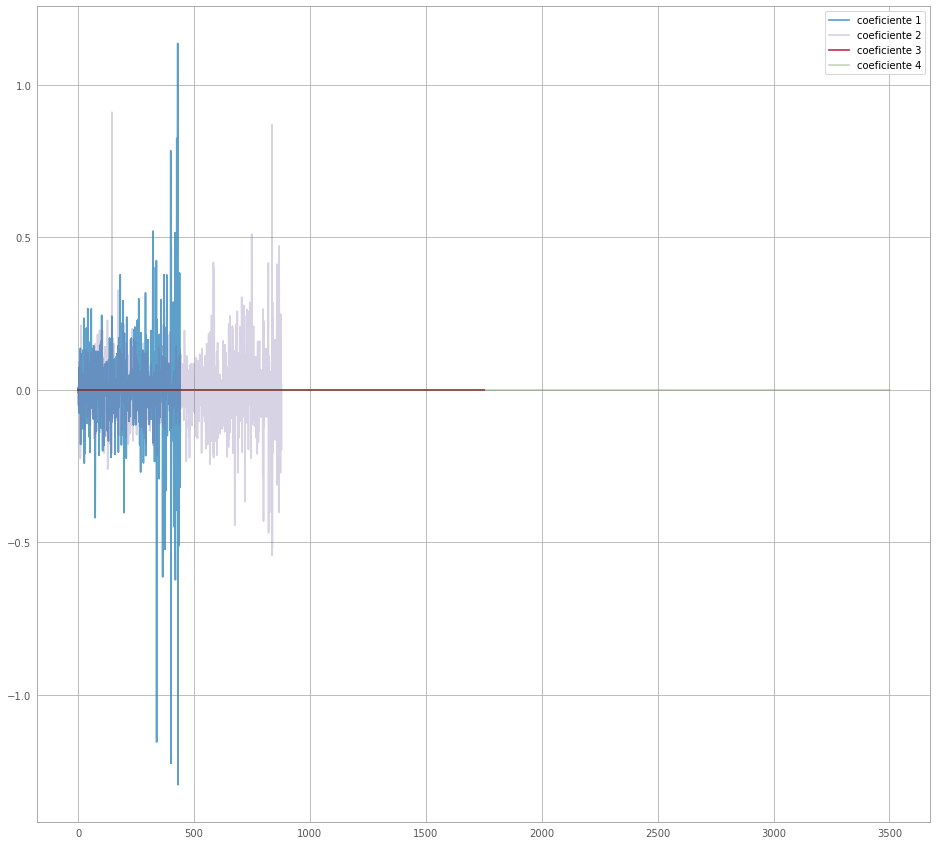

In [ ]:
plt.figure(figsize=(16,15))
for i in range(1,nivel+1):
  plt.plot(range(0, filt_DWTcoeffs[i].shape[0]),filt_DWTcoeffs[i], label='coeficiente '+str(i),alpha=0.3+i/2)
#plt.xlim(200,800)
plt.legend()

In [ ]:
nivel=4
DWTcoeffs = pywt.wavedec(y,wavelet_type,mode='zpd', level=nivel, axis=-1)

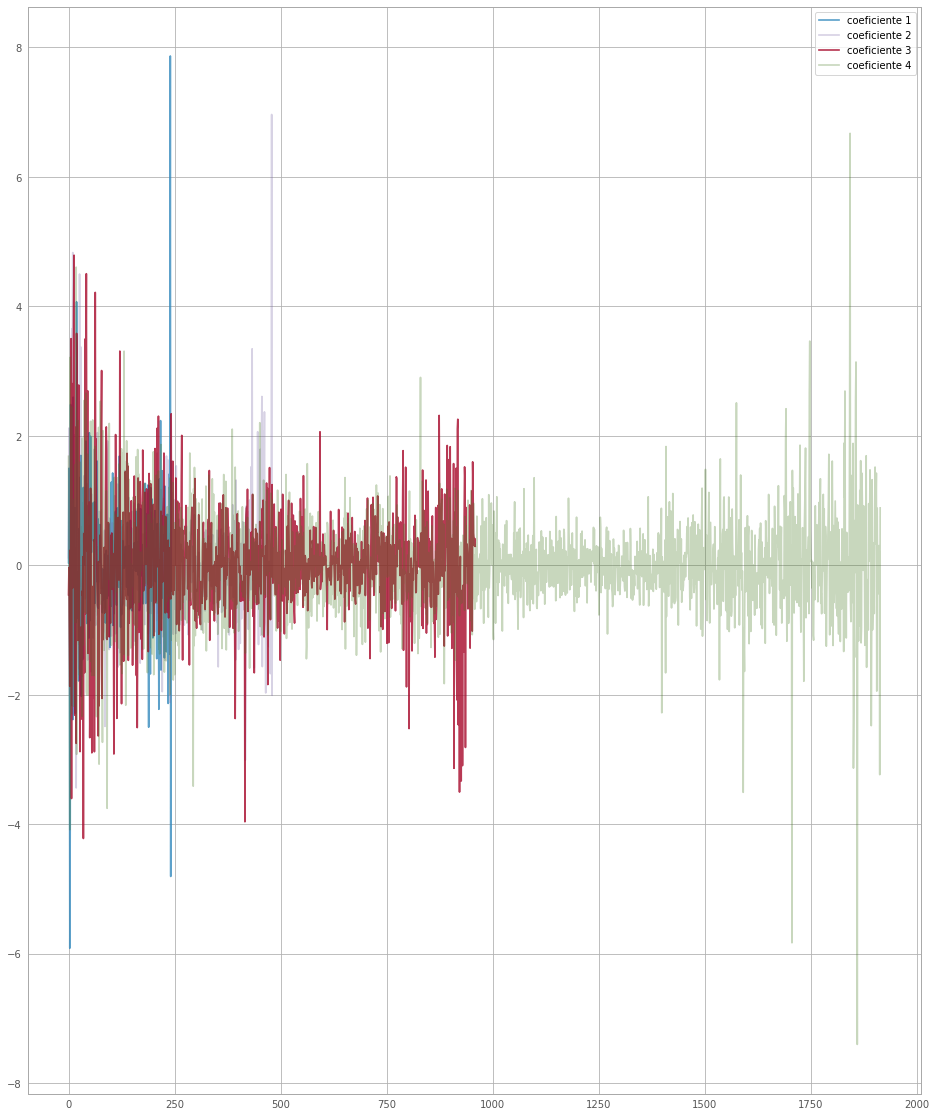

In [ ]:
plt.figure(figsize=(16,20))
for i in range(1,nivel+1):
  plt.plot(range(0, DWTcoeffs[i].shape[0]),DWTcoeffs[i], label='coeficiente '+str(i),alpha=0.3+i/2)
#plt.xlim(200,800)
plt.legend()

In [ ]:
coef_to_cero = 2
DWTcoeffs[coef_to_cero] = np.zeros_like(DWTcoeffs[coef_to_cero])


Reconstruimos la señal

In [ ]:
#https://pywavelets.readthedocs.io/en/0.2.2/ref/signal-extension-modes.html#ref-modes

y_dwt=pywt.waverec(DWTcoeffs,wavelet_type,mode='sym',axis=-1) 

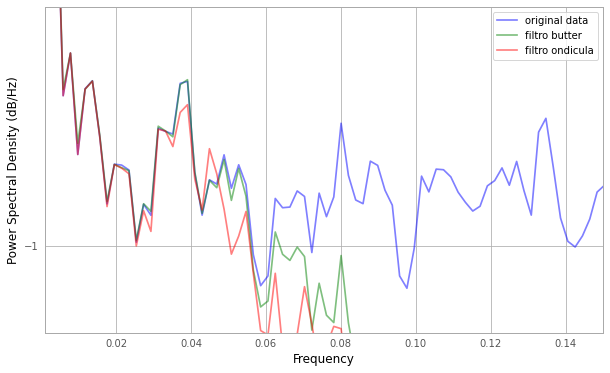

In [ ]:
plt.figure(1,figsize=(10,6))
plt.psd(y, NFFT=512, Fs=1, label='original data', color='blue',alpha=0.5)
plt.psd(y_butt, NFFT=512, Fs=1, label='filtro butter', color='green',alpha=0.5)
plt.psd(y_dwt, NFFT=512, Fs=1, label='filtro ondicula', color='red',alpha=0.5)
plt.ylim(-5,10)
plt.xlim(0.001,0.15)
plt.legend()

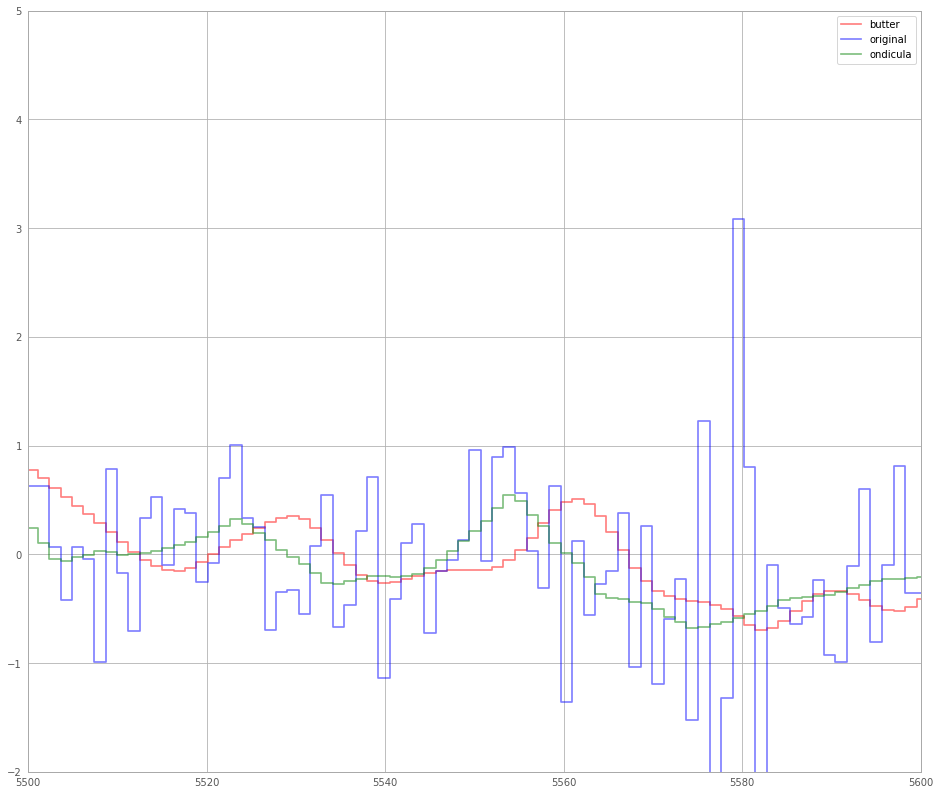

In [ ]:
plt.figure(figsize=(16,14))
alfa = 0.5
plt.plot(x,y_butt,marker='', color= 'r', label = 'butter', drawstyle='steps-mid',alpha=alfa)
plt.plot(x,y,marker='', color= 'b', label = 'original', drawstyle='steps-mid',alpha=alfa)
plt.plot(x,y_dwt,marker='', color= 'g', label = 'ondicula', drawstyle='steps-mid',alpha=alfa)
plt.xlim(5500,5600)
plt.ylim(-2,5)
plt.legend()

In [ ]:
print(f"Varianza espectro para butter {np.var(y_butt)}")
print(f"Varacianza para filtro ondículas {np.var(y_dwt)}")
print(f"Varianza  espectro original {np.var(y)}")


Varianza espectro para butter 3.6964987116811856
Varacianza para filtro ondículas 3.7438101614850825
Varianza  espectro original 4.415320385205613


In [ ]:
print(f"Promedio espectro para butter {np.mean(y_butt)}")
print(f"Promedio para filtro ondículas {np.mean(y_dwt)}")
print(f"Promedio espectro original {np.mean(y)}")


Promedio espectro para butter 1.0291184061303922
Promedio para filtro ondículas 1.0394885549858643
Promedio espectro original 1.041548328548092


Vemos que no modificamos mucho la varianza. Si tenemos señal+ruido y suponiendo que son independintes. Var(señal+ruido) = Var(señal) + Var(ruido), y la esperanza E, E(señal + ruido) = E(señal)+E(ruido) = E(señal) ya que E(ruido) = 0

Podemos ver el error cuadrático medio calculado como la diferencia entre el espectro original y los filtrados.

In [ ]:
print(f"mse para butter {((y_butt - y)**2).mean()}")
print(f"mse para ondículas {((y_dwt - y)**2).mean()}")

mse para butter 0.9085237828407562
mse para ondículas 0.6684047534364816


Vemos que aunque las varianzas no cambián mucho, sí que lo hacen los mse. Esto indica como ya vimos que el filtro Butter nos desfasa la señal.

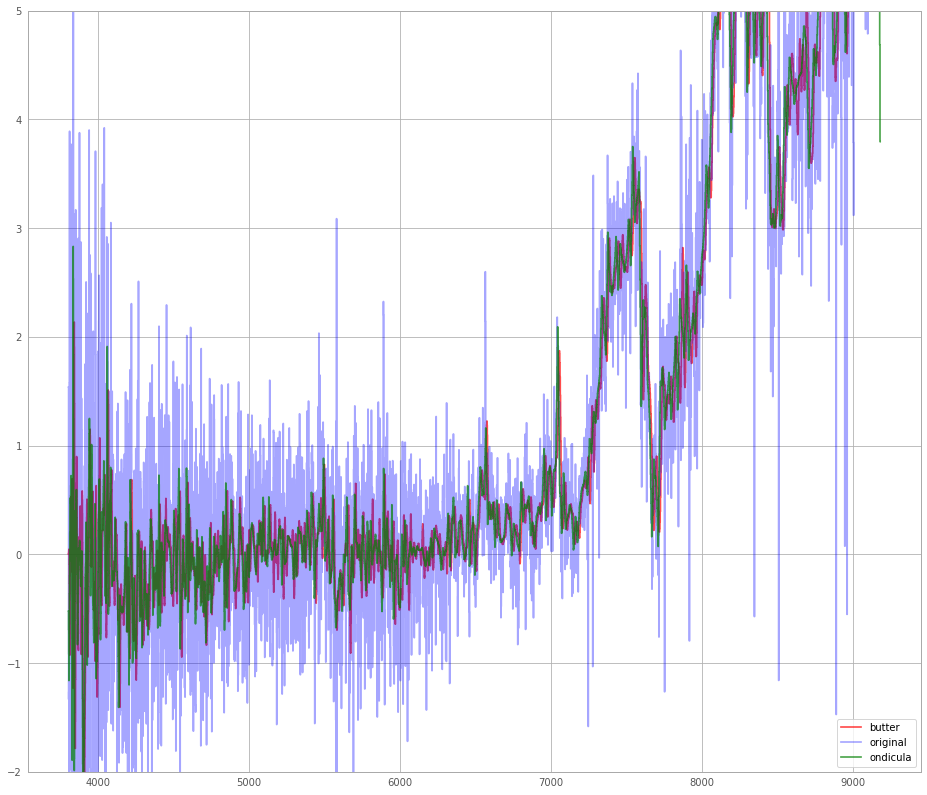

In [ ]:
plt.figure(figsize=(16,14))
alfa = 0.7
plt.plot(x,y_butt,marker='', color= 'r', label = 'butter', drawstyle='steps-mid',alpha=alfa)
plt.plot(x,y,marker='', color= 'b', label = 'original', drawstyle='steps-mid',alpha=alfa/2)
plt.plot(x,y_dwt,marker='', color= 'g', label = 'ondicula', drawstyle='steps-mid',alpha=alfa)
#plt.xlim(5000,6000)
plt.ylim(-2,5)
plt.legend()

# Pruebas filtrado sobre espectros de SDSS

Seleccionamos un espectro.


## Interpolación con sobremuestreo espectros SDSS

Interpolamos según  la base definida de longitudes de onda.
Podemos usar la mediana o bien la media.

In [43]:
indice=50
new_long = np.arange(5000+0.5, 8500, 0.5)
x = df_obj_espectros_raw.loc[indice]['long_A']
y = np.asarray(df_obj_espectros_raw.loc[indice]['flujo'])


In [44]:
f_inter = interpolate.interp1d(x, y)
new_flujo = f_inter(new_long)

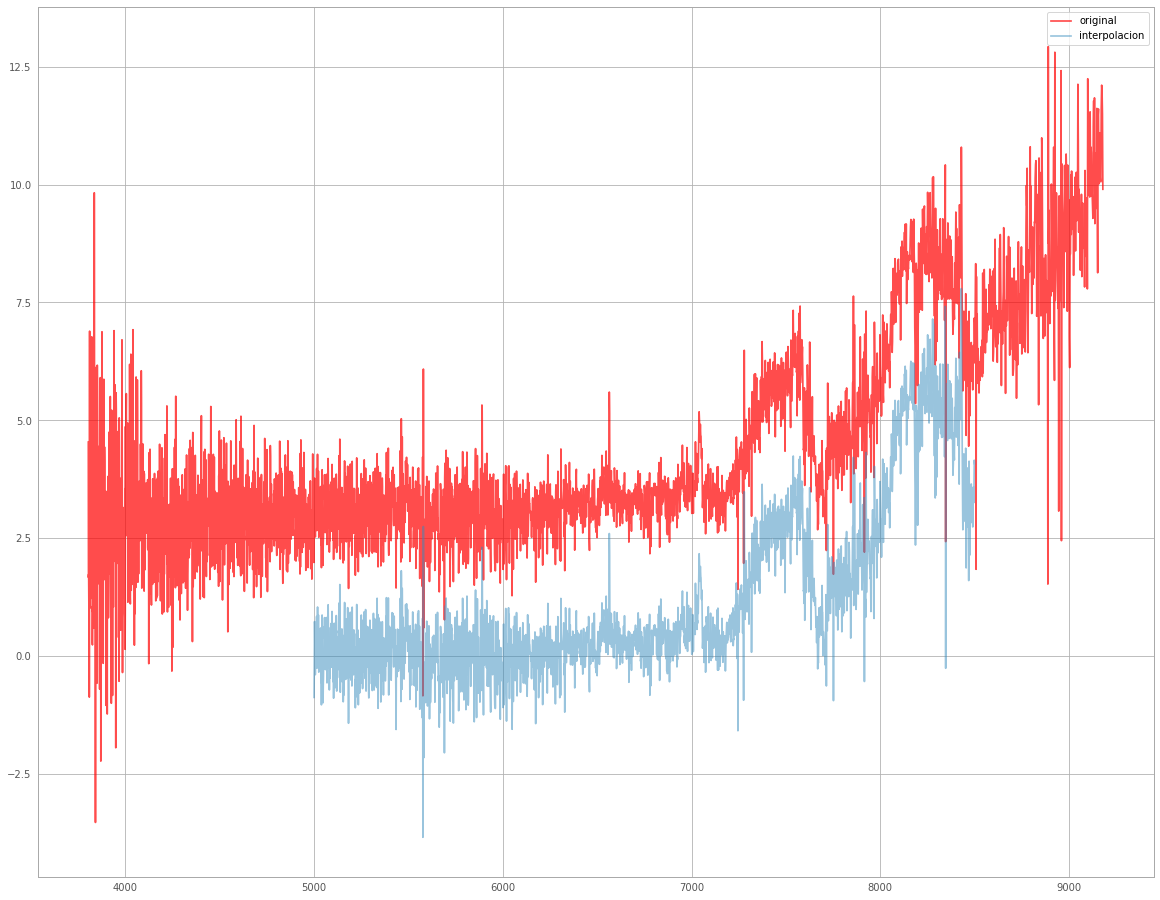

In [45]:
plt.figure(figsize=(20,16))
plt.plot(x, y+3, color='r', label = 'original',alpha = 0.7) #desplazamos en 3 el espectro original
plt.plot(new_long, new_flujo, label='interpolacion', alpha = 0.5)
#plt.ylim(-4,10)
plt.legend()
plt.show()

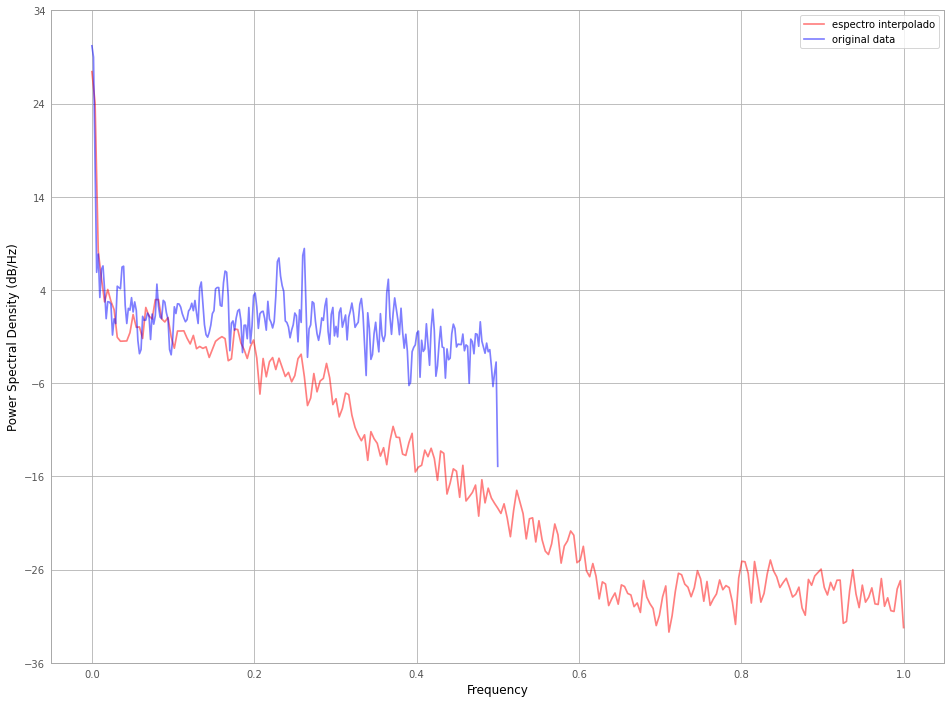

In [46]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.psd.html

plt.figure(1,figsize=(16,12))

plt.psd(new_flujo, NFFT=512, Fs=2, label='espectro interpolado', color='red',alpha=0.5)
plt.psd(y, NFFT=512, Fs=1, label='original data', color='blue',alpha=0.5)
#plt.ylim(-5,20)
#plt.xlim(0.001,2)
plt.legend()

## Filtro butter

In [ ]:
from scipy import signal

In [ ]:
y=new_flujo
x=new_long

In [47]:
Wn=0.25
fb=2
order = 3
sos = signal.butter(order, Wn, 'lp', fs=fb, output='sos')
y_butt = signal.sosfilt(sos, y)

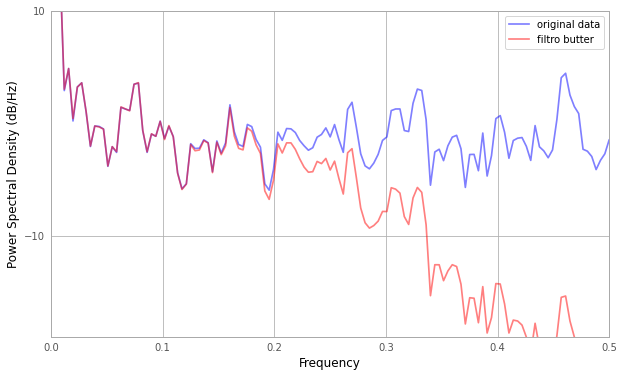

In [48]:
plt.figure(1,figsize=(10,6))
plt.psd(y, NFFT=512, Fs=2, label='original data', color='blue',alpha=0.5)
plt.psd(y_butt, NFFT=512, Fs=2, label='filtro butter', color='red',alpha=0.5)
plt.ylim(-19,10)
plt.xlim(0,0.5)
plt.legend()

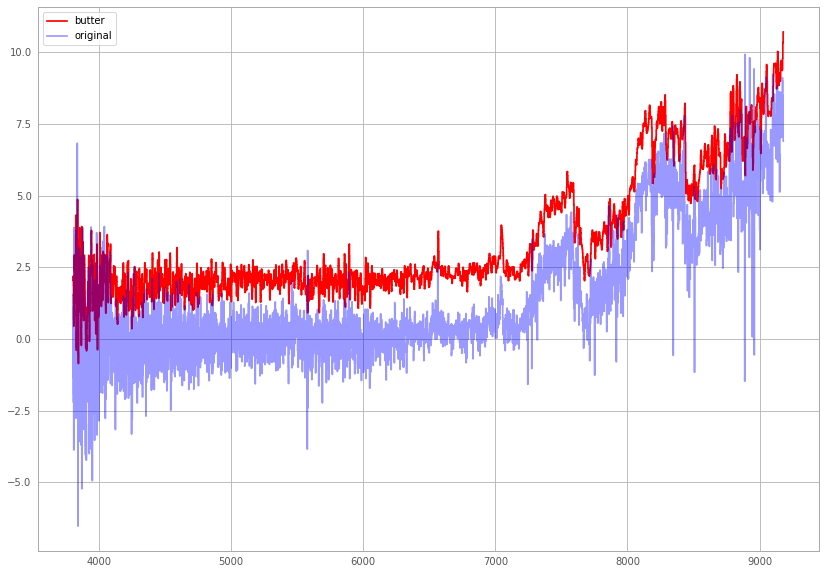

In [49]:
plt.figure(figsize=(14,10))
#for 
plt.plot(x,y_butt+2,marker='', color= 'r', label = 'butter', drawstyle='steps-mid')
plt.plot(x,y,marker='', color= 'b', label = 'original', drawstyle='steps-mid',alpha=0.4)
plt.legend()

## Prueba con ondículas

In [50]:
wavelet_type='sym3'
print(pywt.Wavelet(wavelet_type))

Wavelet sym3
  Family name:    Symlets
  Short name:     sym
  Filters length: 6
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       near symmetric
  DWT:            True
  CWT:            False


In [51]:
nivel=4
DWTcoeffs = pywt.wavedec(y,wavelet_type,mode='sym', level=nivel, axis=-1)

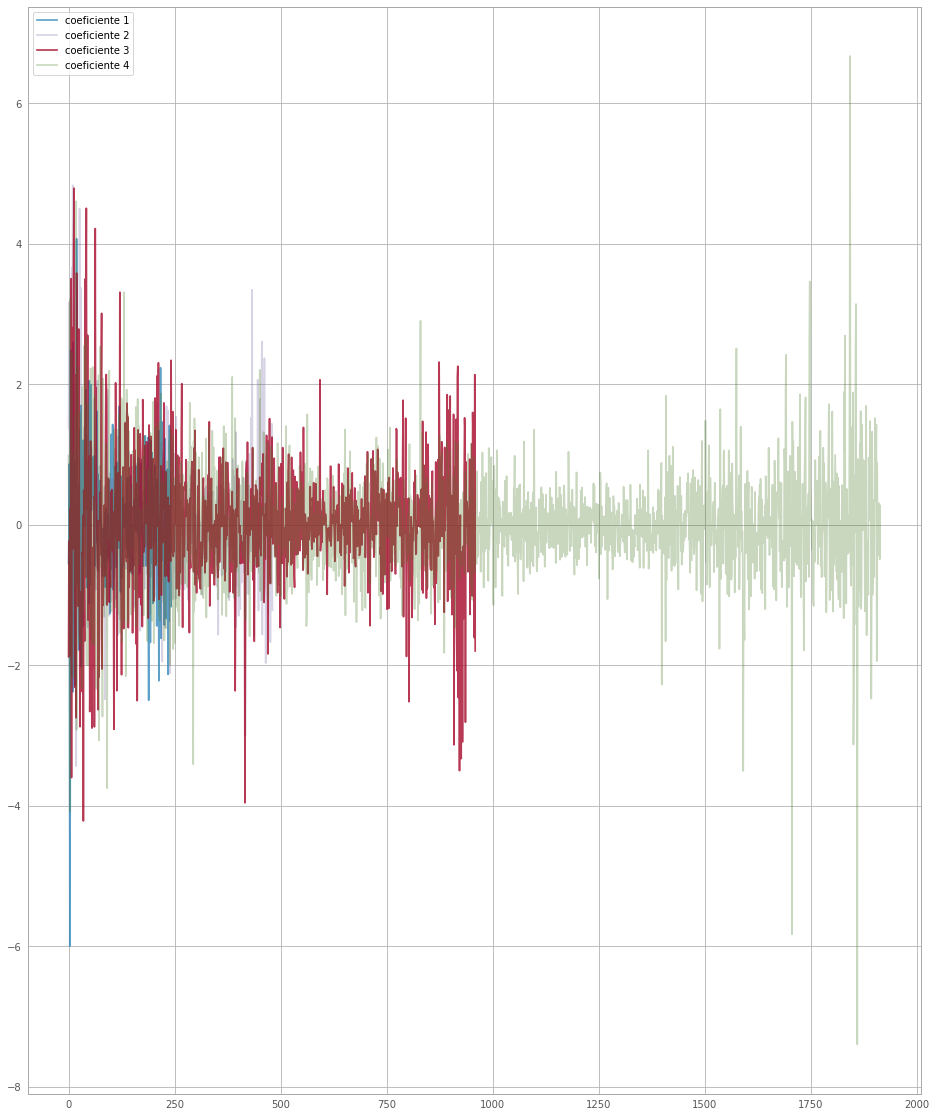

In [52]:
plt.figure(figsize=(16,20))
for i in range(1,nivel+1):
  plt.plot(range(0, DWTcoeffs[i].shape[0]),DWTcoeffs[i], label='coeficiente '+str(i),alpha=0.3+i/2)
#plt.xlim(200,800)
plt.legend()

In [54]:
for coef_to_cero in [4,3]:
  DWTcoeffs[coef_to_cero] = np.zeros_like(DWTcoeffs[coef_to_cero])


Reconstruimos la señal

In [55]:
#https://pywavelets.readthedocs.io/en/0.2.2/ref/signal-extension-modes.html#ref-modes

y_dwt=pywt.waverec(DWTcoeffs,wavelet_type,mode='sym',axis=-1) 
y_dwt=y_dwt[:len(x)]

In [ ]:
len(y_dwt)

6999

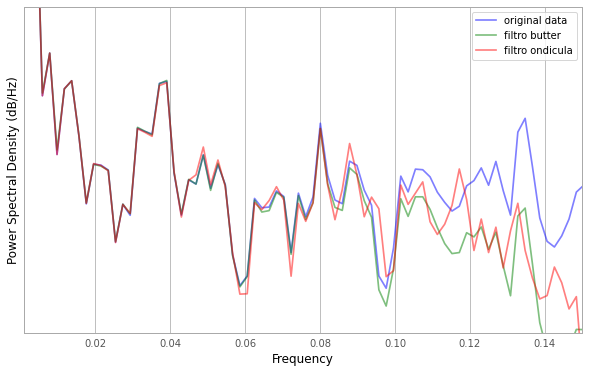

In [56]:
plt.figure(1,figsize=(10,6))
plt.psd(y, NFFT=512, Fs=1, label='original data', color='blue',alpha=0.5)
plt.psd(y_butt, NFFT=512, Fs=1, label='filtro butter', color='green',alpha=0.5)
plt.psd(y_dwt, NFFT=512, Fs=1, label='filtro ondicula', color='red',alpha=0.5)
plt.ylim(-5,10)
plt.xlim(0.001,0.15)
plt.legend()

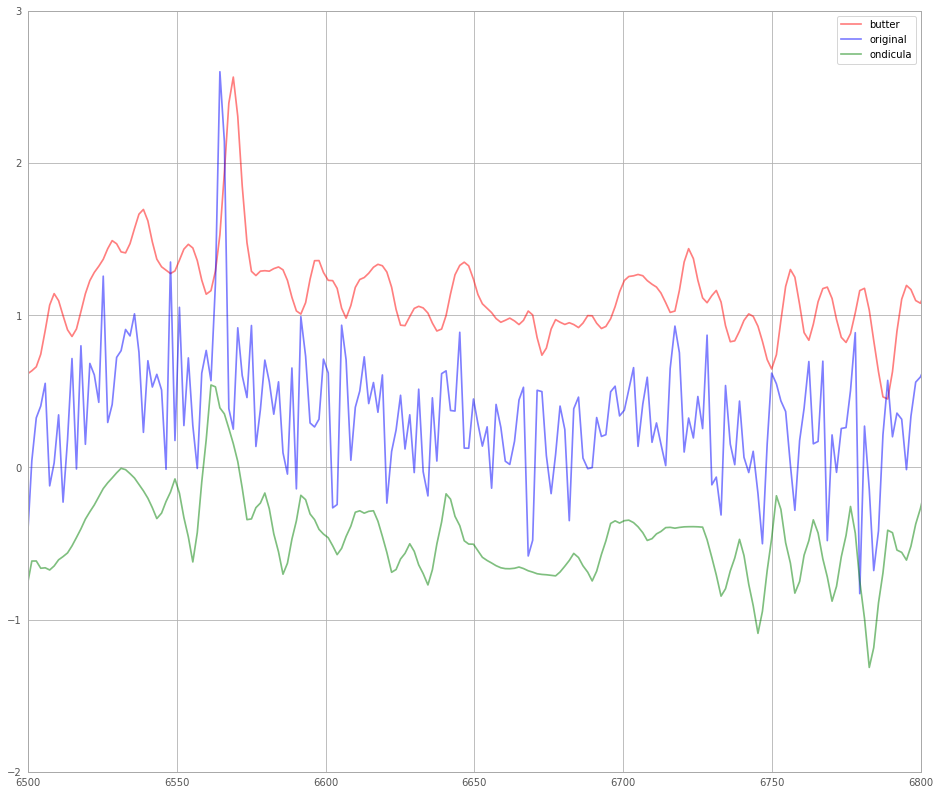

In [60]:
plt.figure(figsize=(16,14))
alfa = 0.5
plt.plot(x,y_butt+0.8,marker='', color= 'r', label = 'butter',alpha=alfa)
plt.plot(x,y,marker='', color= 'b', label = 'original',alpha=alfa)
plt.plot(x,y_dwt-0.8,marker='', color= 'g', label = 'ondicula', alpha=alfa)
#plt.plot(x,y_dwt-0.8,marker='', color= 'g', label = 'ondicula', drawstyle='steps-mid',alpha=alfa)
plt.xlim(6500,6800)
plt.ylim(-2,3)
plt.legend()

In [ ]:
print(f"Varianza espectro para butter {np.var(y_butt)}")
print(f"Varacianza para filtro ondículas {np.var(y_dwt)}")
print(f"Varianza  espectro original {np.var(y)}")


Varianza espectro para butter 2.955575141350134
Varacianza para filtro ondículas 2.9787213482697323
Varianza  espectro original 3.093499419783551


In [ ]:
print(f"Promedio espectro para butter {np.mean(y_butt)}")
print(f"Promedio para filtro ondículas {np.mean(y_dwt)}")
print(f"Promedio espectro original {np.mean(y)}")


Promedio espectro para butter 1.2181404285852848
Promedio para filtro ondículas 1.2217369321135616
Promedio espectro original 1.2217168885262057


Vemos que no modificamos mucho la varianza. Si tenemos señal+ruido y suponiendo que son independintes. Var(señal+ruido) = Var(señal) + Var(ruido), y la esperanza E, E(señal + ruido) = E(señal)+E(ruido) = E(señal) ya que E(ruido) = 0

Podemos ver el error cuadrático medio calculado como la diferencia entre el espectro original y los filtrados.

In [ ]:
print(f"mse para butter {((y_butt - y)**2).mean()}")
print(f"mse para ondículas {((y_dwt - y)**2).mean()}")

mse para butter 0.333809857155136
mse para ondículas 0.11450030282862059


Vemos que aunque las varianzas no cambián mucho, sí que lo hacen los mse. Esto indica como ya vimos que el filtro Butter nos desfasa la señal.

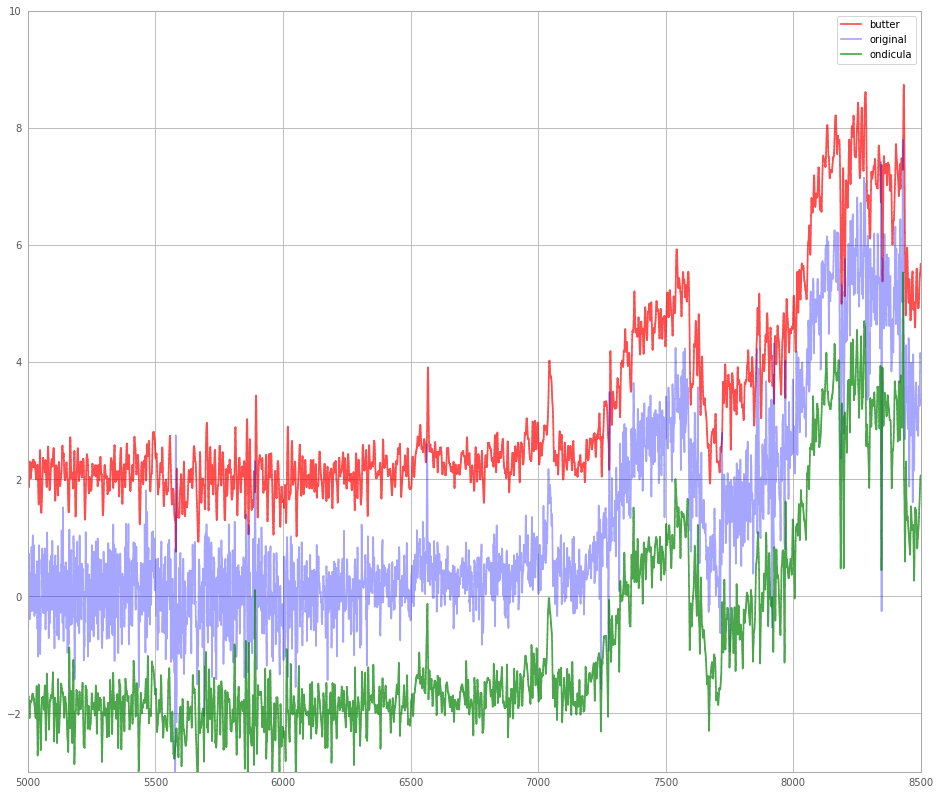

In [ ]:
plt.figure(figsize=(16,14))
alfa = 0.7
plt.plot(x,y_butt+2,marker='', color= 'r', label = 'butter', drawstyle='steps-mid',alpha=alfa)
plt.plot(x,y,marker='', color= 'b', label = 'original', drawstyle='steps-mid',alpha=alfa/2)
plt.plot(x,y_dwt-2,marker='', color= 'g', label = 'ondicula', drawstyle='steps-mid',alpha=alfa)
plt.xlim(5000,8500)
plt.ylim(-3,10)
plt.legend()

# Fin